Connect google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
 ambulanceVideo     data_train.txt    yolov3-ambulance.weights
'Colab Notebooks'   project03a	      yolov3_testing.cfg
 darknet	    python-project2   yolov4
 data_test.txt	    yolov3


Clone, configure, compile Darknet

In [ ]:
!git clone https://github.com/AlexeyAB/darknet  

Cloning into 'darknet'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 14291 (delta 0), reused 2 (delta 0), pack-reused 14285
Receiving objects: 100% (14291/14291), 12.86 MiB | 23.47 MiB/s, done.
Resolving deltas: 100% (9748/9748), done.


In [ ]:
#configure
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# Compile
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

2) Configure yolov3.cfg file

In [ ]:
# Make a copy of yolov3.cfg
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [ ]:
# Change lines in yolov3.cfg file
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches=500200/max_batches=4000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=2@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=2@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=2@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=21@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=21@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=21@' cfg/yolov3_training.cfg

3) Create .names and .data files

In [ ]:
!echo -e 'Mask\nNo mask' > data/obj.names
!echo -e 'classes= 2\ntrain = data/train.txt\nvalid = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov3'> data/obj.data

4) Save yolov3_training.cfg and obj.names files in Google drive

In [ ]:
!cp cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_testing.cfg
!cp data/obj.names /mydrive/yolov3/classes.txt

5) Create a folder and unzip image dataset

In [ ]:
!mkdir data/obj
!unzip /mydrive/yolov3/images.zip -d data/obj

Archive:  /mydrive/yolov3/images.zip
  inflating: data/obj/0_10725.jpg    
  inflating: data/obj/0_10725.txt    
  inflating: data/obj/0_8w7mkX-PHcfMM5s6.jpeg  
  inflating: data/obj/0_8w7mkX-PHcfMM5s6.txt  
  inflating: data/obj/0_Concern-In-China-As-Mystery-Virus-Spreads.jpg  
  inflating: data/obj/0_Concern-In-China-As-Mystery-Virus-Spreads.txt  
  inflating: data/obj/0_Parade_marchingband_1_1047.jpg  
  inflating: data/obj/0_Parade_marchingband_1_1047.txt  
  inflating: data/obj/0_Parade_marchingband_1_114.jpg  
  inflating: data/obj/0_Parade_marchingband_1_114.txt  
  inflating: data/obj/0_Parade_marchingband_1_193.jpg  
  inflating: data/obj/0_Parade_marchingband_1_193.txt  
  inflating: data/obj/0_Parade_marchingband_1_31.jpg  
  inflating: data/obj/0_Parade_marchingband_1_31.txt  
  inflating: data/obj/0_Parade_marchingband_1_362.jpg  
  inflating: data/obj/0_Parade_marchingband_1_362.txt  
  inflating: data/obj/0_Parade_marchingband_1_535.jpg  
  inflating: data/obj/0_Parade_m

6) Create train.txt file

In [ ]:
import glob
images_list = glob.glob("data/obj/*.jpg")
with open("data/train.txt","w") as f:
    f.write("\n".join(images_list))

7) Download pre-trained weights for the convolutional layers file

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-09-06 06:52:28--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  8.92MB/s    in 29s     

2020-09-06 06:52:57 (5.42 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



8) Start training

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show
# uncomment below and comment above to re-start your training from last saved weights
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg /mydrive/yolov3_training_last.weights -dont show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.840984, GIOU: 0.836028), Class: 0.999772, Obj: 0.864827, No Obj: 0.001222, .5R: 1.000000, .75R: 0.933333, count: 30, class_loss = 0.563745, iou_loss = 0.579220, total_loss = 1.142965 
 total_bbox = 2073964, rewritten_bbox = 0.253428 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000011, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000015, iou_loss = 0.000000, total_loss = 0.000015 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.861951, GIOU: 0.859542), Class: 0.999862, Obj: 0.985415, No Obj: 0.001513, .5R: 1.000000, .75R: 0.888889, count: 9, class_loss = 0.002910, iou_loss = 0.197444, total_loss = 0.200354 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.774984, GIOU: 0.768339), Class: 0.999615, Obj: 0.819942, No O

Object detection

In [ ]:
!ls


gdrive	sample_data


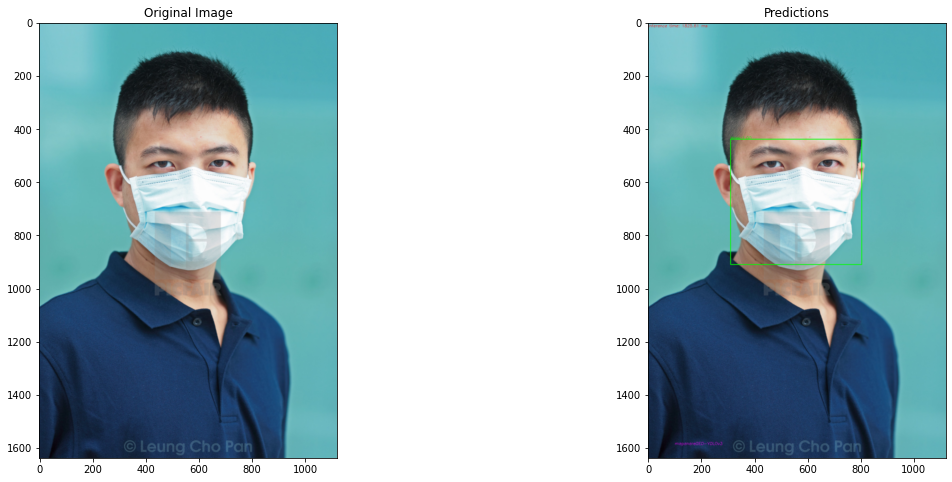

In [ ]:
# this code is a free adaptation of the program object_detection_yolo.py from BigVision LLC.
# This code is written at BigVision LLC. It is based on the Opencv2 project. It is subject to the license terms in the LICENSE file found in this distribution and at http://opencv2.org/license.html

import cv2
import sys
import numpy as np
import os.path
import matplotlib.pyplot as plt

# Initialize the parameters
confThreshold = 0.5  #Confidence threshold
nmsThreshold = 0.4   #Non-maximum suppression threshold
inpWidth = 416       #Width of network's input image
inpHeight = 416      #Height of network's input image

        
# Load names of classes
#classesFile = "yolov3/obj.names"
classesFile = "gdrive/My Drive/yolov3/obj.names"

classes = None
with open(classesFile, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

# Give the configuration and weight files for the model and load the network using them.
modelConfiguration = "gdrive/My Drive/yolov3/yolov3_testing.cfg"
modelWeights = "gdrive/My Drive/yolov3/yolov3_training_last.weights"

net = cv2.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Get the names of the output layers
def getOutputsNames(net):
    # Get the names of all the layers in the network
    layersNames = net.getLayerNames()
    # Get the names of the output layers, i.e. the layers with unconnected outputs
    return [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Draw the predicted bounding box
def drawPred(frame,classId, conf, left, top, right, bottom):
    # Draw a bounding box.
    
    if(classId==0):
        color=(0,255,0)
    else:
        color=(0,0,255)
    
    cv2.rectangle(frame, (left, top), (right, bottom), color, 2)
    
    label = '%.2f' % conf
        
    # Get the label for the class name and its confidence
    if classes:
        assert(classId < len(classes))
        label = '%s:%s' % (classes[classId], label)

    #Display the label at the top of the bounding box
    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(top, labelSize[1])
    #cv2.rectangle(frame, (left, top - round(1.5*labelSize[1])), (left + round(1.5*labelSize[0]), top + baseLine), (255, 255, 255), cv2.FILLED)
    cv2.putText(frame, label, (left, top), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    height2,width2,_=frame.shape
    #cv2.rectangle(frame, (0, int(height2*9/10) , width2, int(height2/10)), (255, 255, 255), cv2.FILLED)
    cv2.putText(frame, "mapanareGEO-YOLOv3", (100, int(height2*97/100)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,255), 1)


# Remove the bounding boxes with low confidence using non-maxima suppression
def postprocess(frame, outs):
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]

    # Scan through all the bounding boxes output from the network and keep only the
    # ones with high confidence scores. Assign the box's class label as the class with the highest score.
    classIds = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            classId = np.argmax(scores)
            confidence = scores[classId]
            if confidence > confThreshold:
                center_x = int(detection[0] * frameWidth)
                center_y = int(detection[1] * frameHeight)
                width = int(detection[2] * frameWidth)
                height = int(detection[3] * frameHeight)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                classIds.append(classId)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])

    # Perform non maximum suppression to eliminate redundant overlapping boxes with
    # lower confidences.
    indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)
    for i in indices:
        i = i[0]
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        drawPred(frame,classIds[i], confidences[i], left, top, left + width, top + height)


def testImage(frame,pathImage):

    #frame=cv2.imread(pathImage)

    if (pathImage):
        # Open the image file
        if not os.path.isfile(pathImage):
            print("Input image file ", pathImage, " doesn't exist")
            sys.exit(1)

        #outputFile = pathImage[:-4]+'_yolo3_out_py.jpg'
    else:
        # Webcam input
        print("need an image")


    # Create a 4D blob from a frame.
    blob = cv2.dnn.blobFromImage(frame, 1/255, (inpWidth, inpHeight), [0,0,0], 1, crop=False)
    # Sets the input to the network
    net.setInput(blob)

    # Runs the forward pass to get output of the output layers
    outs = net.forward(getOutputsNames(net))

    # Remove the bounding boxes with low confidence
    postprocess(frame, outs)

    # Put efficiency information. The function getPerfProfile returns the overall time for inference(t) and the timings for each of the layers(in layersTimes)
    t, _ = net.getPerfProfile()
    label = 'Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency())
    cv2.putText(frame, label, (0, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

    # Write the frame with the detection boxes
    # cv2.imwrite(outputFile, frame.astype(np.uint8))
    return frame
# Process inputs
pathImage="gdrive/My Drive/yolov3/test-image1.jpg"
src=cv2.imread(pathImage)
frame2=cv2.imread(pathImage)
frame2=testImage(frame2,pathImage)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

plt.subplot(121)
plt.imshow(src[:,:,::-1])
plt.title("Original Image")
plt.subplot(122)
plt.imshow(frame2[:,:,::-1])
plt.title("Predictions")
plt.show()


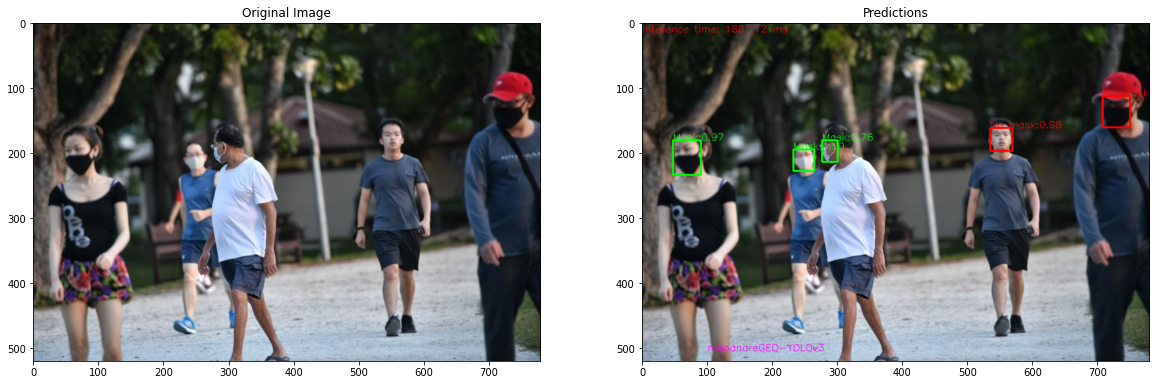

In [ ]:
# Process inputs
pathImage="gdrive/My Drive/yolov3/test-image2.jpg"
src=cv2.imread(pathImage)
frame2=cv2.imread(pathImage)
frame2=testImage(frame2,pathImage)

plt.subplot(121)
plt.imshow(src[:,:,::-1])
plt.title("Original Image")
plt.subplot(122)
plt.imshow(frame2[:,:,::-1])
plt.title("Predictions")
plt.show()


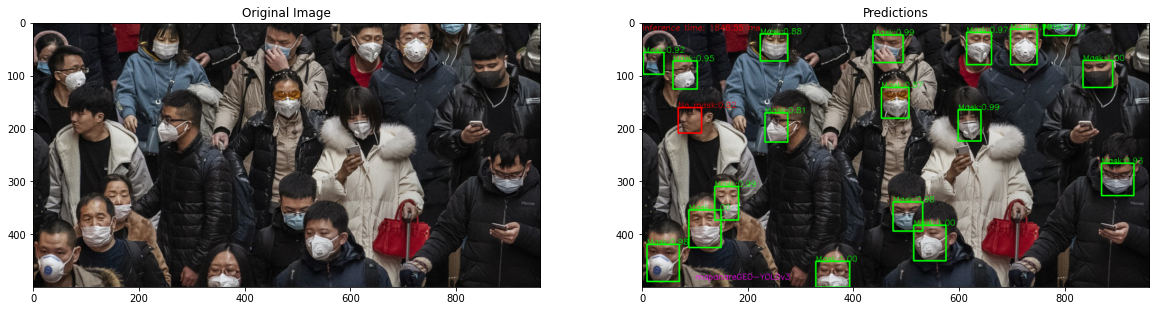

In [ ]:
# Process inputs
pathImage="gdrive/My Drive/yolov3/test-image3.jpg"
src=cv2.imread(pathImage)
frame2=cv2.imread(pathImage)
frame2=testImage(frame2,pathImage)

plt.subplot(121)
plt.imshow(src[:,:,::-1])
plt.title("Original Image")
plt.subplot(122)
plt.imshow(frame2[:,:,::-1])
plt.title("Predictions")
plt.show()

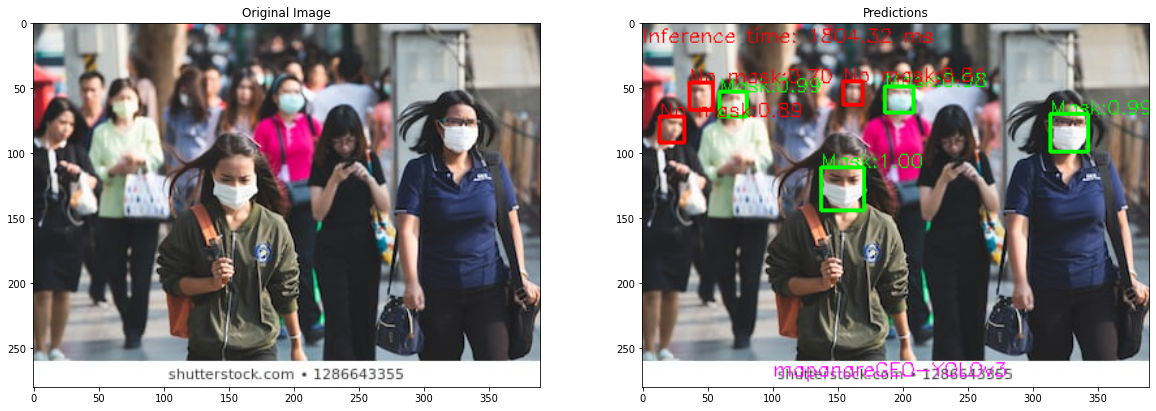

In [ ]:
# Process inputs
pathImage="gdrive/My Drive/yolov3/test-image4.jpg"
src=cv2.imread(pathImage)
frame2=cv2.imread(pathImage)
frame2=testImage(frame2,pathImage)

plt.subplot(121)
plt.imshow(src[:,:,::-1])
plt.title("Original Image")
plt.subplot(122)
plt.imshow(frame2[:,:,::-1])
plt.title("Predictions")
plt.show()

In [ ]:
# Process inputs
pathImage=""
pathVideo="gdrive/My Drive/yolov3/test-video1.mp4"
outputFile = "gdrive/My Drive/yolov3/video2_yolo_out_py.avi"

if (pathVideo):
    # Open the video file
    if not os.path.isfile(pathVideo):
        print("Input video file ", pathVideo, " doesn't exist")
        sys.exit(1)
    cap = cv2.VideoCapture(pathVideo)
    outputFile = pathVideo[:-4]+'_yolo_out_py.avi'
else:
    # Webcam input
    print("there is not video")

# Get the video writer initialized to save the output video

vid_writer = cv2.VideoWriter(outputFile, cv2.VideoWriter_fourcc('M','J','P','G'), 30, (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while cv2.waitKey(1) < 0:
    
    # get frame from the video
    hasFrame, frame = cap.read()
    
    # Stop the program if reached end of video
    if not hasFrame:
        print("Done processing !!!")
        print("Output file is stored as ", outputFile)
        cv2.waitKey(1000)
        # Release device
        cap.release()
        break      
    
    testImage(frame,pathVideo)    
    vid_writer.write(frame.astype(np.uint8))

vid_writer.release()
cap.release()
cv2.destroyAllWindows()

Done processing !!!
Output file is stored as  gdrive/My Drive/yolov3/test-video1_yolo_out_py.avi


In [ ]:
# Process inputs
pathImage=""
pathVideo="gdrive/My Drive/yolov3/test-video2.mp4"
outputFile = "gdrive/My Drive/yolov3/video2_yolo_out_py.avi"

if (pathVideo):
    # Open the video file
    if not os.path.isfile(pathVideo):
        print("Input video file ", pathVideo, " doesn't exist")
        sys.exit(1)
    cap = cv2.VideoCapture(pathVideo)
    outputFile = pathVideo[:-4]+'_yolo_out_py.avi'
else:
    # Webcam input
    print("there is not video")

# Get the video writer initialized to save the output video

vid_writer = cv2.VideoWriter(outputFile, cv2.VideoWriter_fourcc('M','J','P','G'), 30, (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while cv2.waitKey(1) < 0:
    
    # get frame from the video
    hasFrame, frame = cap.read()
    
    # Stop the program if reached end of video
    if not hasFrame:
        print("Done processing !!!")
        print("Output file is stored as ", outputFile)
        cv2.waitKey(1000)
        # Release device
        cap.release()
        break      
    
    testImage(frame,pathVideo)    
    vid_writer.write(frame.astype(np.uint8))

vid_writer.release()
cap.release()
cv2.destroyAllWindows()

Done processing !!!
Output file is stored as  gdrive/My Drive/yolov3/test-video2_yolo_out_py.avi
